<h1>Chapter 3 | Data Exercise #5 | Population of Brazil's largest cities | Measuring the distribution</h1>
<h2>Introduction:</h2>
<p>In this notebook, you will find my notes and code for Chapter 3's <b>exercise 5</b> of the book <a href="https://gabors-data-analysis.com/">Data Analysis for Business, Economics, and Policy</a>, by Gábor Békés and Gábor Kézdi. The question was: 
<p>5. Choose a large country (e.g., China, Japan, the United Kingdom) and find data on the population of its largest cities.</p>
<p>Assignments:</p>
<ul>
    <li>Plot the histogram of the distribution and create a table with the most important summary statistics.</li>
    <li>Plot the histogram of log population as well.</li>
    <li>Finally, create a log rank-log population plot.</li>
    <li>Is the normal, lognormal, or the power-law distribution a good approximation of the distribution? Why?</li>
</ul>
<p>For this exercise, we will use yearly releases of estimates for the population of Brazilian cities, made by IBGE, the country's public statistical office. The data has been cleaned, prepared and properly stored by <a href="https://www.basedosdados.org.br">Base dos Dados</a>, an excellent database for Brazilian public data, just ready to be consummed and analyzed! Thank you Base dos Dados!</p>
<p>As the book's example did, we will focus on measuring the distribution of Brazilian cities with a population above 150,000 inhabitants. 
<h2><b>1.</b> Load the data</h2>

In [23]:
import os
import sys
import warnings
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from plotnine import *
import sys
from mizani.formatters import percent_format
from scipy.stats import linregress


import pandas as pd
import numpy as np
import numpy as np

warnings.filterwarnings("ignore")
%matplotlib inline

In [24]:
# Increase number of returned rows in pandas
pd.set_option("display.max_rows", 500)

In [25]:
# Current script folder
dirname = os.getcwd()
func_path = dirname.split("da_data_exercises")[0]
# Get location folders
data_in = f"{dirname}/data/raw/"
data_out = f"{dirname}/data/clean/"

func = f"{func_path}da_case_studies/ch00-tech_prep/"
sys.path.append(func)

In [26]:
from py_helper_functions import *

In [27]:
df = pd.read_csv(f"{data_in}pop_municipios_clean.csv")

In [28]:
df.head()

,ano,sigla_uf,id_municipio,populacao,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,1991,RO,1100015,31981,1100015,Alta Floresta D'Oeste,-11.9283,-61.9953,0,11
1,1992,RO,1100015,34768,1100015,Alta Floresta D'Oeste,-11.9283,-61.9953,0,11
2,1993,RO,1100015,37036,1100015,Alta Floresta D'Oeste,-11.9283,-61.9953,0,11
3,1994,RO,1100015,39325,1100015,Alta Floresta D'Oeste,-11.9283,-61.9953,0,11
4,1995,RO,1100015,41574,1100015,Alta Floresta D'Oeste,-11.9283,-61.9953,0,11


<h2>1.1 Rename columns</h2>
<p>Because we are writing in English, it makes sense to translate the column names so that they are easily understandable.</p>

In [29]:
df.rename(columns={
    "ano": "year",
    "sigla_uf": "state_abbr",
    "id_municipio": "city_id",
    "populacao": "population",
    "codigo_ibge": "ibge_id",
    "nome": "city_name",
    "capital": "is_capital",
    "codigo_uf": "state_id",
}, inplace=True)

<h2>1.2 Filter the data</h2>
<p>Let's filter the year and return only observations for 2022. In addition, we are looking for the largest cities in Brazil. We can first order the DataFrame by city size and get hold of the largest cities.</p> 

In [30]:
cities_2022 = df.loc[df["year"] == 2022].sort_values(by="population", ascending=False).reset_index(drop=True)

In [31]:
cities_2022.head(20)

,year,state_abbr,city_id,population,ibge_id,city_name,latitude,longitude,is_capital,state_id
0,2022,SP,3550308,12200180,3550308,São Paulo,-23.53290,-46.6395,1,35
1,2022,RJ,3304557,6625849,3304557,Rio de Janeiro,-22.91290,-43.2003,1,33
2,2022,DF,5300108,2923369,5300108,Brasília,-15.77950,-47.9297,1,53
3,2022,BA,2927408,2610987,2927408,Salvador,-12.97180,-38.5011,1,29
4,2022,CE,2304400,2596157,2304400,Fortaleza,-3.71664,-38.5423,1,23
5,2022,MG,3106200,2392678,3106200,Belo Horizonte,-19.91020,-43.9266,1,31
6,2022,AM,1302603,2054731,1302603,Manaus,-3.11866,-60.0212,1,13
7,2022,PR,4106902,1871789,4106902,Curitiba,-25.41950,-49.2646,1,41
8,2022,PE,2611606,1494586,2611606,Recife,-8.04666,-34.8771,1,26
9,2022,GO,5208707,1414483,5208707,Goiânia,-16.68640,-49.2643,1,52


In [32]:
cities_2022["index"] = cities_2022.index + 1

In [33]:
cities_2022.sort_values(by="index", ascending=True).head()

,year,state_abbr,city_id,population,ibge_id,city_name,latitude,longitude,is_capital,state_id,index
0,2022,SP,3550308,12200180,3550308,São Paulo,-23.53290,-46.6395,1,35,1
1,2022,RJ,3304557,6625849,3304557,Rio de Janeiro,-22.91290,-43.2003,1,33,2
2,2022,DF,5300108,2923369,5300108,Brasília,-15.77950,-47.9297,1,53,3
3,2022,BA,2927408,2610987,2927408,Salvador,-12.97180,-38.5011,1,29,4
4,2022,CE,2304400,2596157,2304400,Fortaleza,-3.71664,-38.5423,1,23,5


<p>Let's get only the cities with more than 150,000 inhabitants.</p>

In [34]:
cities_2022 = cities_2022.loc[cities_2022["population"] > 150_000]

In [35]:
cities_2022.count()

year          204
state_abbr    204
city_id       204
population    204
ibge_id       204
city_name     204
latitude      204
longitude     204
is_capital    204
state_id      204
index         204
dtype: int64

<h2>2. EDA</h2>
<h3>2.1 Plot the histogram of the distribution and create a table with the most important summary statistics</h3>
<h4>2.1.1 Plotting the histogram</h4>

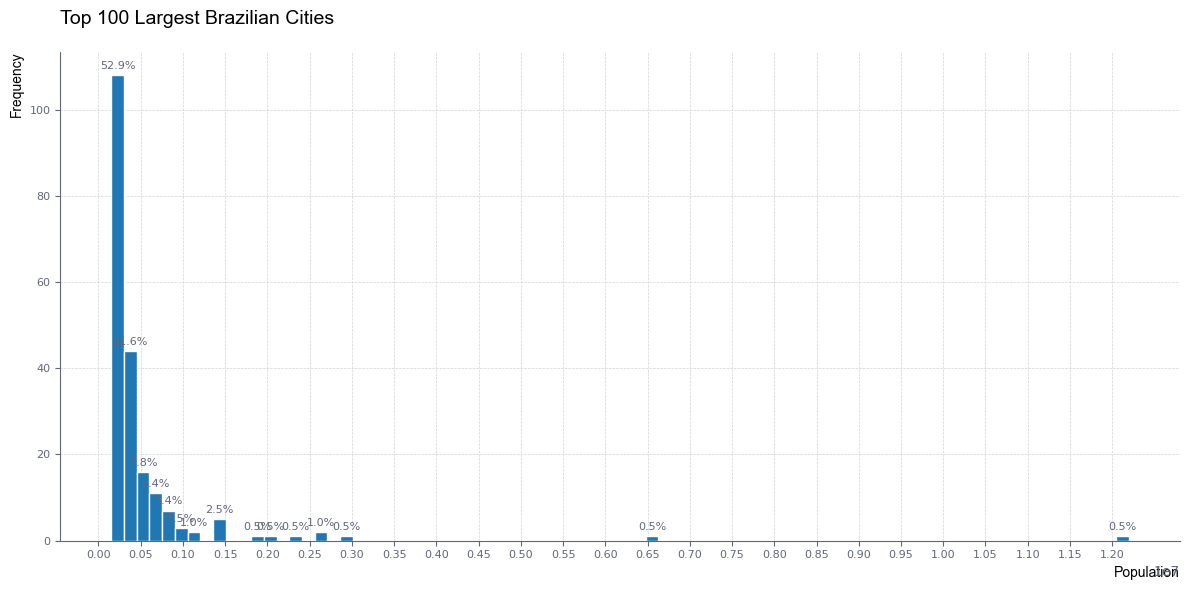

In [91]:
# Visualize the distribution of population, no filters
# Set the bin width
bin_width = 150_000

# Create a new figure with adjusted padding
plt.figure(figsize=(12, 6))
plt.subplots_adjust(left=0.2, right=1, top=0.9, bottom=0.1)

# Plot the histogram
n, bins, patches = plt.hist(cities_2022["population"], bins=int((cities_2022["population"].max() - cities_2022["population"].min()) / bin_width),
         edgecolor="white", zorder=2)

# Set x and y axis labels
plt.xlabel("Population",
            fontsize=10, 
            color="black",
            loc="right",
            fontdict={"fontname": "Arial"},)
plt.ylabel("Frequency", 
            fontsize=10,
            color="black", 
            loc="top",
            fontdict={"fontname": "Arial"},)

# Set x and y ticks interval
plt.xticks(range(0 , cities_2022["population"].max() , 500_000), fontsize=8, color="#61677A")
plt.yticks(fontsize=8, color="#61677A")

# Change the color of the ticks and axes
tick_color = "#61677A"
plt.tick_params(axis="both", colors=tick_color)

# Add frequency count to each bar
total_data_points = cities_2022["population"].count()
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    percentage = y / total_data_points * 100
    if percentage > 0:
        plt.annotate(f"{percentage:.1f}%", xy=(x, y), xytext=(0, 3), textcoords="offset points", 
                     ha="center", va="bottom", fontsize=8, color="#61677A")
    else:
        pass

# Add title to the chart
plt.title(f"Top 100 Largest Brazilian Cities",
          fontsize=14, 
          loc="left",
          fontdict={"fontname": "Arial"},
          pad=20)

# Add a light grid behind the bars
plt.grid(color="lightgray", linestyle="--", linewidth=0.5, zorder=1)

# Remove the top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_color("#61677A")
plt.gca().spines["left"].set_color("#61677A")

plt.tight_layout()
plt.show()

<p>We can already tell that we are dealing with a <b>extremely</b> skewed distribution. 60% of the largest Brazilian cities have a population of less than <b>500,000</h>. <b>15%</b> have between <b>500,000</b> and <b>1 million</b> persons living on them. Only <b>13%</b> of the cities have population sizes between <b>1 million</b> and 6</b> million. We then have only <b>2%</b>|, or two cities, above this level. We know which cities they are: Rio de Janeiro and São Paulo, respectively.</p>
<p>We can now create a table with the main statistics from this distribution.</p>
<h4>2.1.2 Creating a table of summary statistics</h4>

In [38]:
def bowley_skewness(data):
    mean = data.mean()
    median = data.median()
    std = data.std()
    return (mean - median) / std

statistics = {
    "Statistics": ["Mean", "Median", 
                   "Mode", "Min", "Max",
                   "IQR", "25th percentile", "75th percentile",
                   "Skewness", "Standard deviation",
                   "Number of observations", ],
    "Value": [
        cities_2022["population"].mean(),
        cities_2022["population"].median(),
        cities_2022["population"].mode().iloc[0],
        cities_2022["population"].min(),
        cities_2022["population"].max(),
        cities_2022["population"].quantile(0.75) - cities_2022["population"].quantile(0.25),
        cities_2022["population"].quantile(0.25),
        cities_2022["population"].quantile(0.75),
        bowley_skewness(cities_2022["population"]),
        cities_2022["population"].std(),
        cities_2022["population"].count(),
    ],
}

summary_table = pd.DataFrame.from_dict(statistics).round(1)
summary_table

,Statistics,Value
0,Mean,518433.9
1,Median,284871.0
2,Mode,150281.0
3,Min,150281.0
4,Max,12200180.0
5,IQR,253243.0
6,25th percentile,202313.8
7,75th percentile,455556.8
8,Skewness,0.2
9,Standard deviation,1025815.4


<p>Observations:</p>
<li>The mean is <b>840,041</b>, the median is <b>460,768</b>, and the mode is <b>289,622</b>. Such high differences between these estimates tell us that indeed we are dealing with a very skewed distribution. The mean is around <b>2.5</b> times larger than the mode, while our median is around <b>half</b> of our mean value.</li>
<li>The data is widely distributed. We have a minimum value of <b>289,622</b> and a maximum value of <b>12,001,180</b>.</li>
<li>The 25th and the 75th percentile are <b>362,277</b> and <b>758,110</b>, with an IQR of <b>395,581</b>. Half of the cities are in this interval, which tells us that there are many Brazilians living in medium-sized cities. Also, we can affirm once again that this distribution is very skewed, as the central values are very far from the extreme observations on the upper part of the data.</li>
<li>The standard deviation is <b>1,396,826</b>, which tells us that the dispersion of our data is very, very high. We can expect that, for a mean value of 840,041, observations can vary by around this value.</li>
<li>The skewness is positive, which confirms that the mean is indeed higher than tha medium and thus resulting in a skewed distribution, with extreme values above the mean.</li>
</ul>
<h3>2.2 Plot the histogram of log population as well.</h3>

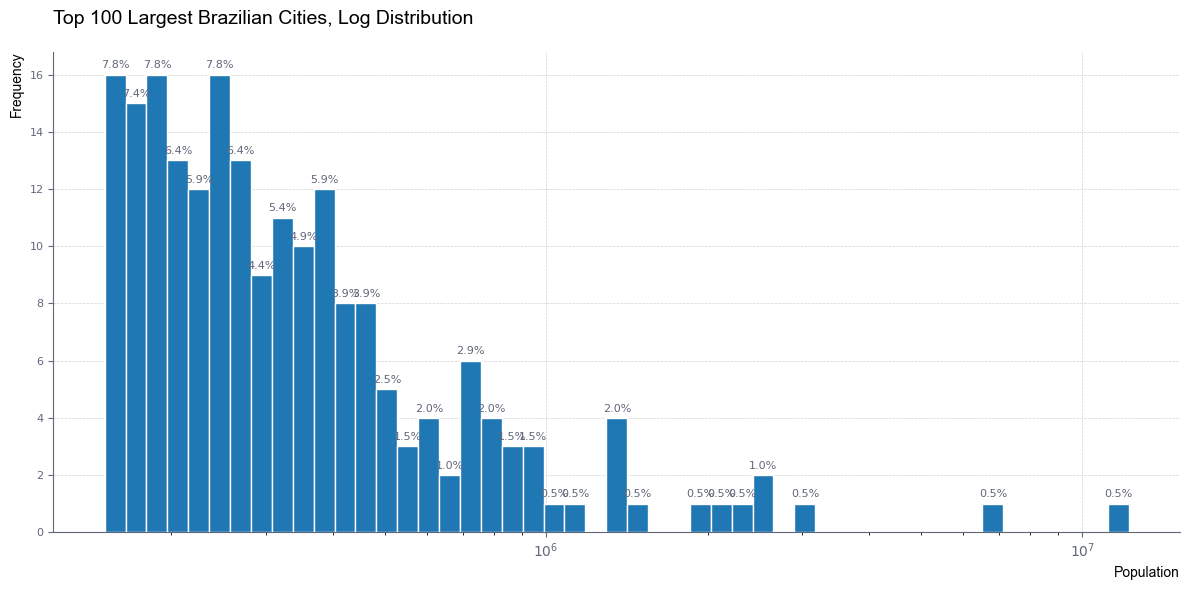

In [39]:
# Visualize the distribution of population, no filters
# Set the bin width
bin_width = 250_000

# Create a new figure with adjusted padding
plt.figure(figsize=(12, 6))
plt.subplots_adjust(left=0.2, right=1, top=0.9, bottom=0.1)

# histogram on log scale
logbins = np.geomspace(cities_2022["population"].min(), cities_2022["population"].max())

# Plot the histogram
n, bins, patches = plt.hist(cities_2022["population"], bins=(logbins),
         edgecolor="white", zorder=2)


# Set x and y axis labels
plt.xscale("log")
plt.xlabel("Population",
            fontsize=10, 
            color="black",
            loc="right",
            fontdict={"fontname": "Arial"},)
plt.ylabel("Frequency", 
            fontsize=10,
            color="black", 
            loc="top",
            fontdict={"fontname": "Arial"},)

# Set x and y ticks interval
# plt.xticks(range(0 , cities_2022["population"].max() , 500_000), fontsize=8, color="#61677A")
plt.yticks(fontsize=8, color="#61677A")

# Change the color of the ticks and axes
tick_color = "#61677A"
plt.tick_params(axis="both", colors=tick_color)

# Add frequency count to each bar
total_data_points = cities_2022["population"].count()
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    percentage = y / total_data_points * 100
    if percentage > 0:
        plt.annotate(f"{percentage:.1f}%", xy=(x, y), xytext=(0, 3), textcoords="offset points", 
                     ha="center", va="bottom", fontsize=8, color="#61677A")
    else:
        pass

# Add title to the chart
plt.title(f"Top 100 Largest Brazilian Cities, Log Distribution",
          fontsize=14, 
          loc="left",
          fontdict={"fontname": "Arial"},
          pad=20)

# Add a light grid behind the bars
plt.grid(color="lightgray", linestyle="--", linewidth=0.5, zorder=1)

# Remove the top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_color("#61677A")
plt.gca().spines["left"].set_color("#61677A")

plt.tight_layout()
plt.show()

<p>Our dataset now looks less skewed, but not that much. It resembles a lognormal distribution now.</p>
<h3>2.3 Finally, create a log rank-log population plot.</h3>


In [40]:
cities_2022.head()

,year,state_abbr,city_id,population,ibge_id,city_name,latitude,longitude,is_capital,state_id,index
0,2022,SP,3550308,12200180,3550308,São Paulo,-23.53290,-46.6395,1,35,1
1,2022,RJ,3304557,6625849,3304557,Rio de Janeiro,-22.91290,-43.2003,1,33,2
2,2022,DF,5300108,2923369,5300108,Brasília,-15.77950,-47.9297,1,53,3
3,2022,BA,2927408,2610987,2927408,Salvador,-12.97180,-38.5011,1,29,4
4,2022,CE,2304400,2596157,2304400,Fortaleza,-3.71664,-38.5423,1,23,5


In [41]:
cities_2022["ln_population"] = np.log(cities_2022["population"])
# Get ln(rank) vs ln(x)
cities_2022["ln_rank"] = np.log(cities_2022["index"])

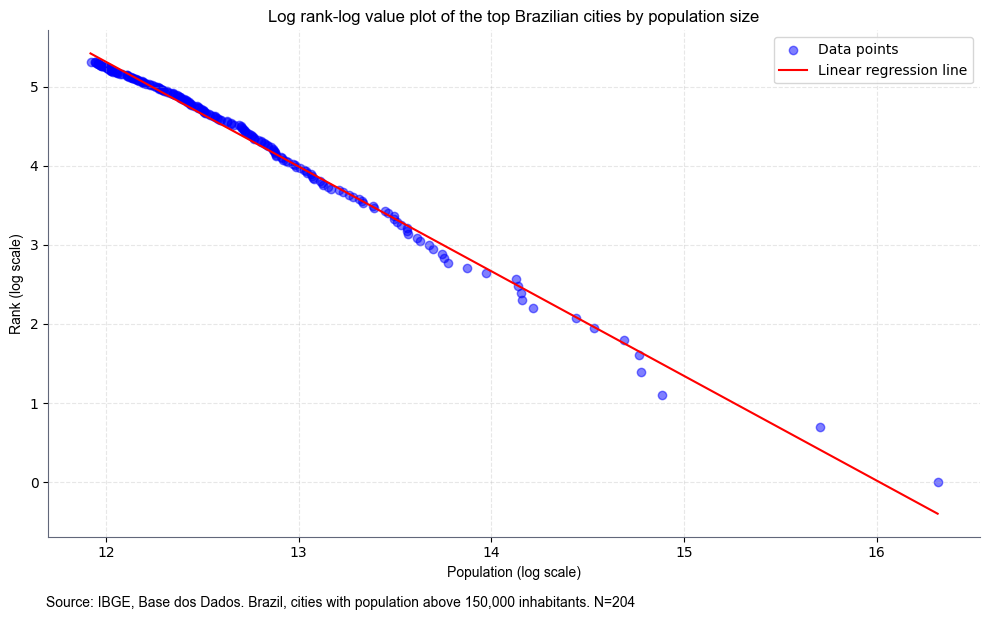

In [82]:
# Create the log-ran population plot
plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=0.2, right=1, top=0.9, bottom=0.1)

plt.scatter(cities_2022["ln_population"], cities_2022["ln_rank"],
         marker="o",
         linestyle="-",
         color="b",
         label="Data points",
         alpha=0.5)

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    cities_2022["ln_population"], cities_2022["ln_rank"]
    )
x_vals = np.linspace(min(cities_2022["ln_population"]), max(cities_2022["ln_population"]), 100)
y_vals = slope * x_vals + intercept

# Plot the linea regressoin line
plt.plot(x_vals, y_vals, color="red", label="Linear regression line")


# Add labels and title
plt.xlabel("Population (log scale)", 
           fontdict={"fontname": "Arial"})
plt.ylabel("Rank (log scale)",
           fontdict={"fontname": "Arial"})
plt.title("Log rank-log value plot of the top Brazilian cities by population size",
          fontdict={"fontname": "Arial"})
plt.grid(True, which="both", ls="--", alpha=0.3)

# Add legend
plt.legend()

# Add caption
txt=f"Source: IBGE, Base dos Dados. Brazil, cities with population above 150,000 inhabitants. N={cities_2022['population'].count()}"
plt.figtext(0.64, -0.02, txt, wrap=True, horizontalalignment='right', fontsize=10, fontdict={"fontname": "Arial"})

# Remove the top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_color("#61677A")
plt.gca().spines["left"].set_color("#61677A")

plt.tight_layout()
plt.show()

<h3>2.4 Is the normal, lognormal, or the power-law distribution a good approximation of the distribution? Why?</h3>
<p>The <b>normal distribution</b> is <b>not</b> a good approximation of the distribution. The shape of our dataset is not bell shaped and does not resemble a Gaussian distribution. Also, there is a high degree of <b>asymmetry</b>, a tenet that is rejected for normal distributions.</p>
<p>The <b>lognormal distribution</b> also is <b>not</b> a good approximation of the distribution. That would be the case if, after distributing the natural logarithm of the variable with its log, we got a normal distribution of the data. Although the distribution looked less skewed, we still got a longer right tail.</p>
<p>Finally, the <b>power-law distribution</b> is a <b>good</b> approximation of the distribution. And why?</p>
<ul>
<li><b>Highly uneven distribution</b>. Most of our cities have relatively small values, but a few of them have much larger values, which results in a extremely skewed distribution.</li>
<li><b>Decay with power</b>. The frequency of cities by population size decreases rapidly as the scale increases.</li>
<li><b>Exponent properties</b>.
<li><b>Scale-invariance</b>. Although this property would need further investigation, this would translate into a continuous ratio along a scale regardless of the area we are looking at.</li>
<li><b>Continuous decrease of its distribution</b> on the left part of the histogram, which contrasts with a lognormal distribution.</li>
<li><b>The log-rank value plot</b> confirms the validity of a power-law distribution assumption. It follows a relevant property of such distribution, that is, the fact that the probability of values to be close to any value <code>x</code> is proportional to <math>x<sup>-α</sup></math>.</li>
<p>In conclusion, given the distribution of the dataset, together with its main statistics, we can affirm that the <b>power-law distribution</b> best describes how city sizes in Brazil are distributed. The majority of them are indeed small, with a handful number of very large or extremely large observations.</p>
<h2>4. Conclusion</h2>
<p>That was another very interesting and rewarding data exercise. Learning more about the distribution of data is one of those early steps in data analysis that will assist you on later stages.</p>
<p>That was it for today! Thank you and have a great one!</p>
<hr>